In [30]:
install.packages("ISLR")
install.packages("ggplot2")
library(ISLR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [74]:
head(College)
df<-College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


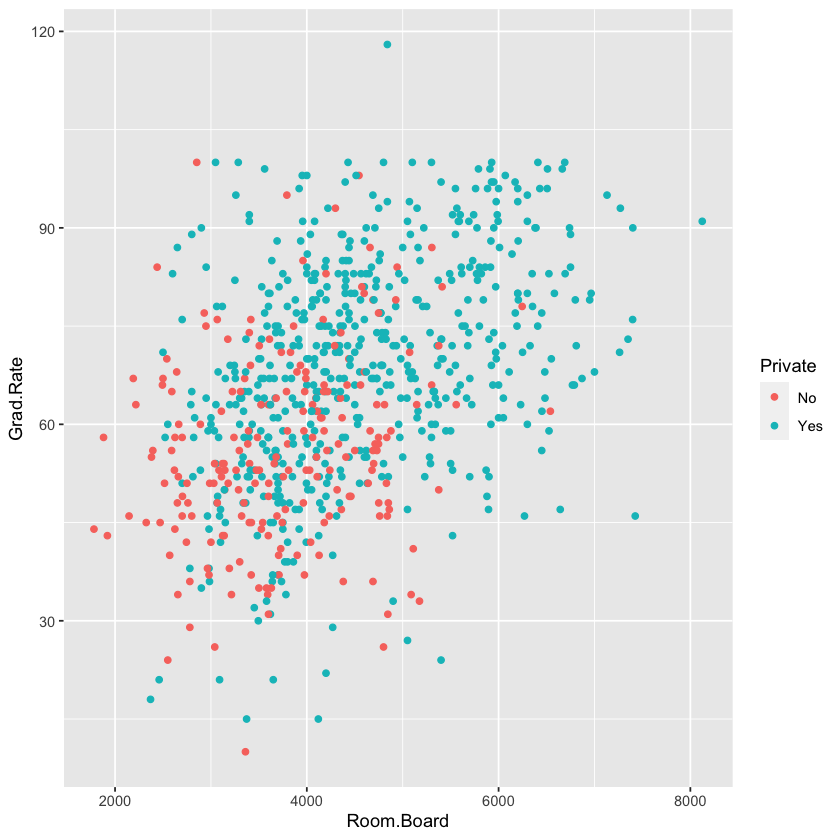

In [75]:
#Exploratory data analysis
#Room and board cost vs graduation rate
library(ggplot2)
plt=ggplot(df, aes(Room.Board, Grad.Rate))+geom_point(aes(color=Private))
plt

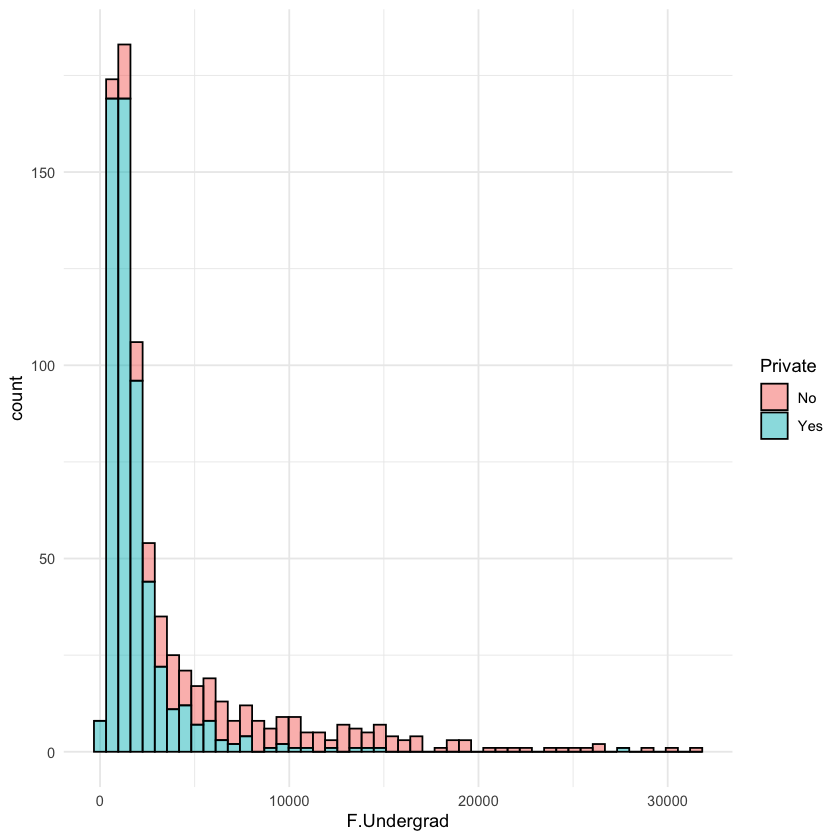

In [76]:
#Looks like there is a slight trend, as you increase graduation rate you increase the room and board
#Histogram
ggplot(df, aes(F.Undergrad))+geom_histogram(aes(fill=Private),color='black',bins=50, alpha=0.5)+ theme_minimal()


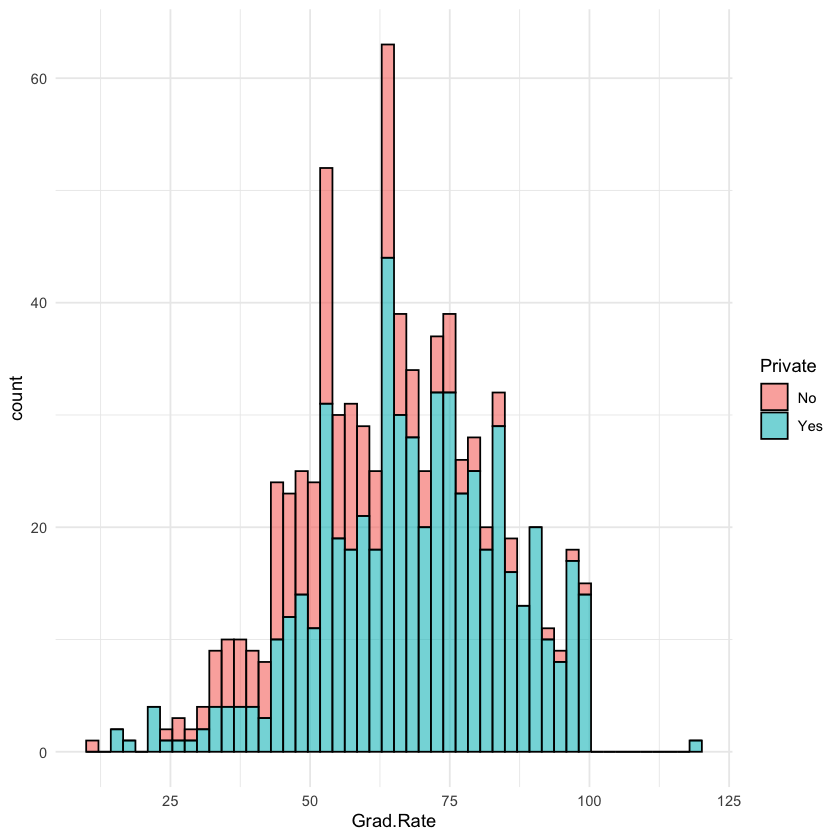

In [77]:
ggplot(df,aes(Grad.Rate))+geom_histogram(aes(fill=Private),color='black',bins=50,alpha=0.6)+theme_minimal()
#One college has a graduation rate greater than 100%

In [78]:
#Here, identify Cazenovia College as the college with greater than 100% graduation rate, change to 100%
subset(df, Grad.Rate>100)
df['Cazenovia College', 'Grad.Rate']<-100
subset(df,Grad.Rate>100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [79]:
#Train, test, split
install.packages('caTools')


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [80]:
library(caTools)
set.seed(101)

In [81]:
sample<-sample.split(df$Private,SplitRatio=0.70)
train<-subset(df,sample==T)
test<-subset(df,sample==F)

In [82]:
install.packages('rpart')
library(rpart)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [86]:
tree<-rpart(Private ~.,method='class',data=train)
summary(tree)

Call:
rpart(formula = Private ~ ., data = train, method = "class")
  n= 544 

          CP nsplit rel error    xerror       xstd
1 0.48648649      0 1.0000000 1.0000000 0.07013217
2 0.21621622      1 0.5135135 0.5540541 0.05638541
3 0.02702703      2 0.2972973 0.3918919 0.04863747
4 0.02027027      3 0.2702703 0.4189189 0.05007929
5 0.01000000      8 0.1554054 0.3783784 0.04788977

Variable importance
F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
         17          15          13          11          10           8 
  S.F.Ratio  Room.Board      Expend   Grad.Rate   Top10perc   Top25perc 
          7           5           4           4           3           1 

Node number 1: 544 observations,    complexity param=0.4864865
  predicted class=Yes  expected loss=0.2720588  P(node) =1
    class counts:   148   396
   probabilities: 0.272 0.728 
  left son=2 (164 obs) right son=3 (380 obs)
  Primary splits:
      F.Undergrad < 2992.5  to the right, improve=94.012

In [87]:
#Checking the prediction for which school is a private school and which one is not 
tree.preds<-predict(tree,test)
head(tree.preds)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


In [91]:
#Make a new column to indicate whether private or not depending on the prediction above
#If prediction is greater than 0.5, 'yes', the school is predicted to be private
tree.preds<-as.data.frame(tree.preds)

joiner<-function(x){
    if(x>=0.5){
        return('Yes')
        }else{
        return('No')
    }
    } 

tree.preds$Private<-sapply(tree.preds$Yes,joiner)
print(head(tree.preds))

                                                 No       Yes Private
Adrian College                          0.003311258 0.9966887     Yes
Alfred University                       0.003311258 0.9966887     Yes
Allegheny College                       0.003311258 0.9966887     Yes
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887     Yes
Alma College                            0.003311258 0.9966887     Yes
Amherst College                         0.003311258 0.9966887     Yes


In [92]:
table(tree.preds$Private,test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


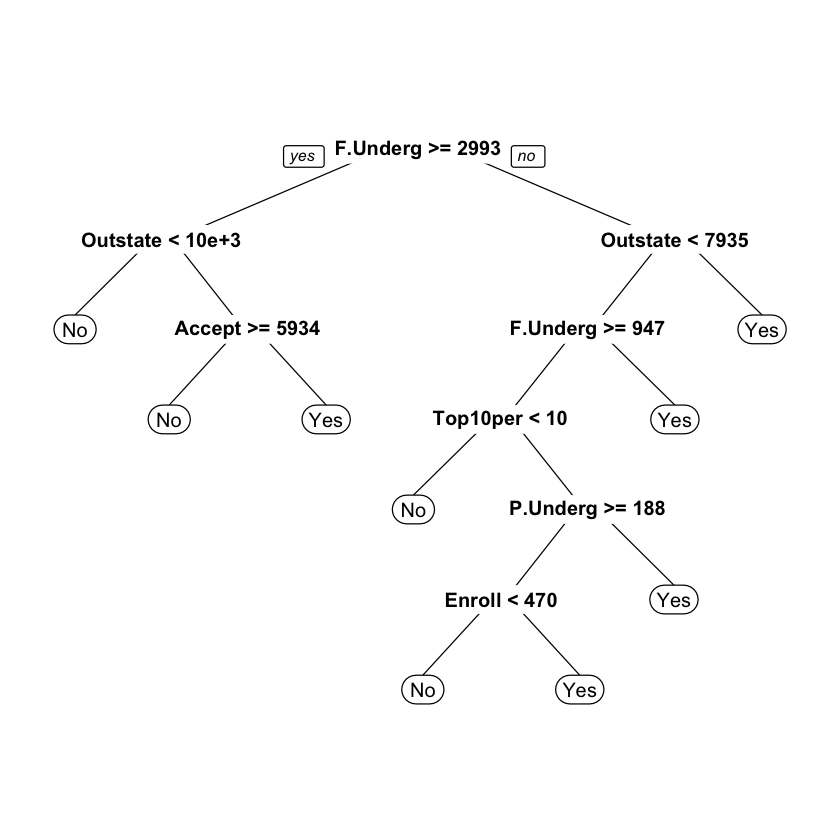

In [95]:
#Printing the decision tree using the rparts.plot library 
install.packages('rpart.plot')
library(rpart.plot)
prp(tree)

### Random Forest Model 


In [98]:
install.packages('randomForest')
library(randomForest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [101]:
#Importance (impurity index how much information yu get when you split by a certain value)
rand.model<-randomForest(Private~.,data=train, importance=TRUE)
rand.model$confusion
rand.model$importance

,No,Yes,class.error
No,126,22,0.14864865
Yes,11,385,0.02777778


,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.031109674,0.0152436018,0.019465075,9.618237
Accept,0.028383818,0.0150181031,0.018513309,13.339165
Enroll,0.033303071,0.0284091855,0.029723519,21.448221
Top10perc,0.012503292,0.0051077167,0.007087107,5.857641
Top25perc,0.003891504,0.0036835019,0.003761931,4.294509
F.Undergrad,0.154602745,0.0730637136,0.094949427,40.691657
P.Undergrad,0.039216591,0.0056539327,0.014803908,14.772364
Outstate,0.148251276,0.0597814078,0.083662399,39.588754
Room.Board,0.017316931,0.0127274038,0.014030586,12.398986
Books,0.002832662,0.0000302329,0.000806557,2.034613


In [102]:
#Getting predictions
rand.model.preds<-predict(rand.model,test)
table(rand.model.preds, test$Private)

                
rand.model.preds  No Yes
             No   56   6
             Yes   8 163